In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv" # covid case source data
hillspop = 1471968 # population of hillsborough county florida for density calcs



In [2]:
df = pd.read_csv(url) # read in the csv from the NYT

In [3]:
df.head() # ensure that worked

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [4]:
df = df.iloc[12500:] # clear out the early data with little relevance for hills. county

In [5]:
df_florida = df.loc[df['state'] == 'Florida'] # filter down to just Florida
df_hills  = df_florida.loc[df['county'] == 'Hillsborough'] # filter down to just Hillsborough County

In [6]:
# the dataset has cumulative cases
# we want daily new cases, so create real_cases with just the daily number
df_hills = df_hills.assign(real_cases = df_hills.loc[:,'cases'].diff())



In [7]:
# to get active cases, we need to make an assumption for how long a person is infected
# for this, 2 weeks was assumed the infected period
# so, a rolling 2 week sum will provide something like an active case count

# df_hills['2wk_case_sum'] = df_hills.iloc[:,6].rolling(window=14).sum()

df_hills = df_hills.assign(two_wk_case_sum = df_hills.loc[:,'real_cases'].rolling(window = 14).sum())

In [8]:
# add in the population of Hillsborough County

df_hills = df_hills.assign(pop = hillspop)

In [9]:
# create a case rate field

df_hills = df_hills.assign(case_rate = df_hills['two_wk_case_sum']/df_hills['pop']) 

In [10]:
# percentages can by difficult for people to really conceptualize
# here, a field is created to describe the odds instead i.e. 1 in every 150 people are currently infected

df_hills = df_hills.assign(case_odds = (1/df_hills['case_rate']).round())

In [11]:
df_hills.tail() #how's it look?

,date,county,state,fips,cases,deaths,real_cases,two_wk_case_sum,pop,case_rate,case_odds
800786,2020-12-06,Hillsborough,Florida,12057.0,61276,960.0,515.0,5794.0,1471968,0.003936,254.0
804032,2020-12-07,Hillsborough,Florida,12057.0,61599,967.0,323.0,5764.0,1471968,0.003916,255.0
807277,2020-12-08,Hillsborough,Florida,12057.0,62149,969.0,550.0,5983.0,1471968,0.004065,246.0
810522,2020-12-09,Hillsborough,Florida,12057.0,62439,972.0,290.0,5942.0,1471968,0.004037,248.0
813766,2020-12-10,Hillsborough,Florida,12057.0,63339,977.0,900.0,6842.0,1471968,0.004648,215.0


In [12]:
# slim down the set to start 6/1 and just date and case odds fields

covid_odds_plot = df_hills.iloc[67:,:].loc[:,['date','case_odds']]



In [13]:
covid_odds_plot

,date,case_odds
197185,2020-06-01,2461.0
200258,2020-06-02,2393.0
203334,2020-06-03,2161.0
206414,2020-06-04,2067.0
209496,2020-06-05,1927.0
...,...,...
800786,2020-12-06,254.0
804032,2020-12-07,255.0
807277,2020-12-08,246.0
810522,2020-12-09,248.0


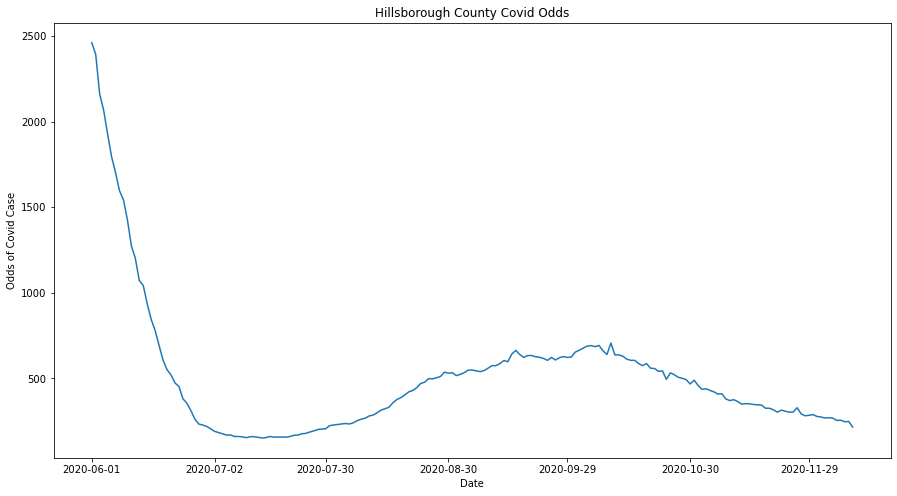

In [14]:
# Plot
x = covid_odds_plot.iloc[:,0]
y = covid_odds_plot.iloc[:,1]

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(x, y)


ax.set(xlabel='Date', ylabel='Odds of Covid Case',
       title='Hillsborough County Covid Odds')

# ax.locator_params(nbins=100, axis='x')
# plt.locator_params(axis='x', nbins=6)
# ax.grid()
# ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
# ax.xaxis.set_major_locator(ticker.LinearLocator(3))

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(months)

# datemin = np.datetime64(covid_odds_plot['date'][0], 'Y')
# datemax = np.datetime64(data['date'][-1], 'Y') + np.timedelta64(1, 'Y')
# ax.set_xlim(datemin, datemax)

fig.savefig("test.png")
plt.show()


In [15]:
# define some key statistics

data_current_through = covid_odds_plot.date.max()
worst_odds = covid_odds_plot.case_odds.min()
worst_odds_date = 'a'
current_odds = covid_odds_plot['case_odds'].iloc[-1]

In [16]:
# start laying out the story

print('Hillsborough County, Florida summary through ',data_current_through)
print()
print('Worst odds so far were 1 in ',worst_odds,' people infected')
print('The current odds are 1 in ',current_odds)


Hillsborough County, Florida summary through  2020-12-10

Worst odds so far were 1 in  151.0  people infected
The current odds are 1 in  215.0
